### Palmer Penguins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

#Simplified data for 3 penguin species (Chinstrap, Adelie, Gentoo) from original penguin data sets
df = pd.read_csv('C:/Users/Sunwoo/datasets/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


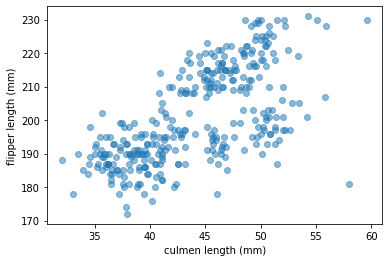

In [2]:
df = df.dropna()
dataset = df.values
x = dataset[:, 2]    #culmen_length_mm
y = dataset[:, 4]    #flipper_length_mm

plt.scatter(x, y, alpha=0.5)
plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.show()

[(51.376770496650295, 217.89308053551463), (46.20119172801283, 189.47343003778855), (41.206776083226686, 180.33053605192066)]


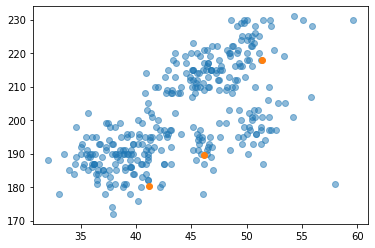

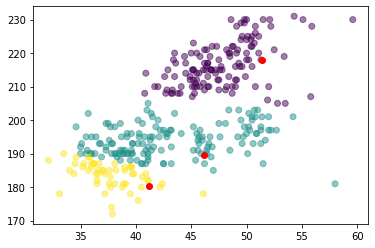

[array([ 47.72403101, 216.65116279]), array([ 43.13489933, 194.05369128]), array([ 37.68928571, 183.51785714])]
<class 'list'>
[(51.376770496650295, 217.89308053551463), (46.20119172801283, 189.47343003778855), (41.206776083226686, 180.33053605192066)]
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


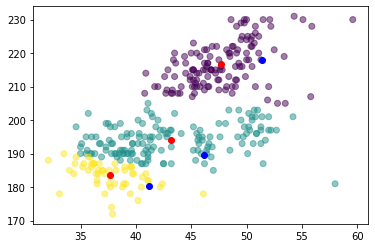

In [3]:
#step 1 : place k random centroids(center value)
#k means 3 species
k = 3
#create 3 random x, y coordinates between min value and max value
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print(centroids)

plt.scatter(x, y, alpha=0.5)    #data are blue
plt.scatter(centroids_x, centroids_y)    #centroids are orange
plt.show()

#step 2 : assign data to nearest centroid
#calculate euclid distance (each data are vector)
def distance(a, b) :
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))])**0.5

#create labels that grouping each data points
labels = np.zeros(len(dataset))
sepal_length_width = np.array(list(zip(x, y)))

#calculate each data points' euclid distance from centroids
for i in range(len(dataset)) :
    distances = np.zeros(k)    #[0. 0. 0.]
    for j in range(k) :
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)    #return min index (the closest centroid)
    labels[i] = cluster

#show which data is included in which centroid group
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

#step 3 : update centroids
centroids_old = deepcopy(centroids)

#update centroids by calculate each group's mean of (x, y)
for i in range(k) :
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

#compare old centroids to new centroids
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')    #centroids moved to center
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.show()

#step 4 : repeat step 2-3 until convergence
#initialize centroids_old, labels, error
centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(dataset))
error = np.zeros(k)

#calculate error which is distance between old and new centroids
for i in range(k) :
    error[i] = distance(centroids_old[i], centroids[i])

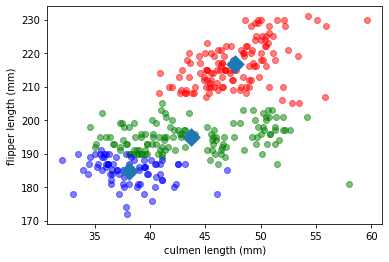

In [4]:
#find optimal centroids
while error.all() != 0 :
    #step 2 : assign data to nearest centroid
    for i in range(len(dataset)) :
        distances = np.zeros(k)
        for j in range(k) :
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)
        labels[i] = cluster
    
    #step 3 : update centroids
    centroids_old = deepcopy(centroids)
    for i in range(k) :
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    
    #recalculate error
    for i in range(k) :
        error[i] = distance(centroids_old[i], centroids[i])

colors = ['r', 'g', 'b']
for i in range(k) :
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.show()